Solution inspired in the following resources:
* https://www.kaggle.com/code/fatmakursun/house-price-some-of-regression-models (Overall "template" for EDA, Feature Engineering and selection and regression models application and metrics)

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('baseball.csv')

## Commonly used statistics

Most of these terms also apply to softball. Commonly used statistics with their abbreviations are explained here. The explanations below are for quick reference and do not fully or completely define the statistic; for the strict definition, see the linked article for each statistic.

### Batting statistics

1B – Single: hits on which the batter reaches first base safely without the contribution of a fielding error

2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error

3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error

AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction

AB/HR – At bats per home run: at bats divided by home runs

BA – Batting average (also abbreviated AVG): hits divided by at bats (H/AB)

BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.

BABIP – Batting average on balls in play: frequency at which a batter reaches a base after putting the ball in the field of play. Also a pitching category.

BB/K – Walk-to-strikeout ratio: number of bases on balls divided by number of strikeouts

BsR – Base runs: Another run estimator, like runs created

EQA – Equivalent average: a player's batting average absent park and league factors

FC – Fielder's choice: times reaching base safely because a fielder chose to try for an out on another runner

GO/AO – Ground ball fly ball ratio: number of ground ball outs divided by number of fly ball outs

GDP or GIDP – Ground into double play: number of ground balls hit that became double plays

GPA – Gross production average: 1.8 times on-base percentage plus slugging percentage, divided by four

GS – Grand slam: a home run with the bases loaded, resulting in four runs scoring, and four RBIs credited to the batter

H – Hit: reaching base because of a batted, fair ball without error by the defense

HBP – Hit by pitch: times touched by a pitch and awarded first base as a result

HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error

HR/H – Home runs per hit: home runs divided by total hits

ITPHR – Inside-the-park home run: hits on which the batter successfully touched all four bases, without the contribution of a fielding error or the ball going outside the ball park.

IBB – Intentional base on balls: times awarded first base on balls (see BB above) deliberately thrown by the pitcher. Also known as IW (intentional walk).

ISO – Isolated power: a hitter's ability to hit for extra bases, calculated by subtracting batting average from slugging percentage

K – Strike out (also abbreviated SO): number of times that a third strike is taken or swung at and missed, or bunted foul. Catcher must catch the third strike or batter may attempt to run to first base.

LOB – Left on base: number of runners neither out nor scored at the end of an inning

OBP – On-base percentage: times reached base (H + BB + HBP) divided by at bats plus walks plus hit by pitch plus sacrifice flies (AB + BB + HBP + SF)

OPS – On-base plus slugging: on-base percentage plus slugging average

PA – Plate appearance: number of completed batting appearances

PA/SO – Plate appearances per strikeout: number of times a batter strikes out to their plate appearance

R – Runs scored: number of times a player crosses home plate

RC – Runs created: an attempt to measure how many runs a player has contributed to their team

RP – Runs produced: an attempt to measure how many runs a player has contributed

RBI – Run batted in: number of runners who score due to a batter's action, except when the batter grounded into a double play or 
reached on an error

RISP – Runner in scoring position: a breakdown of a batter's batting average with runners in scoring position, which includes runners at second or third base

SF – Sacrifice fly: fly balls hit to the outfield which, although caught for an out, allow a baserunner to advance

SH – Sacrifice hit: number of sacrifice bunts which allow runners to advance on the basepaths

SLG – Slugging percentage: total bases achieved on hits divided by at-bats (TB/AB)

TA – Total average: total bases, plus walks, plus hit by pitch, plus steals, minus caught stealing divided by at bats, minus hits, plus caught stealing, plus grounded into double plays [(TB + BB + HBP + SB – CS)/(AB – H + CS + GIDP)]

TB – Total bases: one for each single, two for each double, three for each triple, and four for each home run [H + 2B + (2 × 3B) + (3 × HR)] or [1B + (2 × 2B) + (3 × 3B) + (4 × HR)]

TOB – Times on base: times reaching base as a result of hits, walks, and hit-by-pitches (H + BB + HBP)

XBH – Extra base hits: total hits greater than singles (2B + 3B + HR)

### Baserunning statistics

SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense

CS – Caught stealing: times tagged out while attempting to steal a base

SBA or ATT – Stolen base attempts: total number of times the player has attempted to steal a base (SB+CS)

SB% – Stolen base percentage: the percentage of bases stolen successfully. (SB) divided by (SBA) (stolen bases attempted).

DI – Defensive Indifference: if the catcher does not attempt to throw out a runner (usually because the base would be insignificant), the runner is not awarded a steal. Scored as a fielder's choice.

R – Runs scored: times reached home plate legally and safely

UBR – Ultimate base running: a metric that assigns linear weights to every individual baserunning event in order to measure the impact of a player's baserunning skill

### Pitching statistics

BB – Base on balls (also called a "walk"): times pitching four balls, allowing the batter to take first base

BB/9 – Bases on balls per 9 innings pitched: base on balls multiplied by nine, divided by innings pitched

BF – Total batters faced: opponent team's total plate appearances

BK – Balk: number of times pitcher commits an illegal pitching action while in contact with the pitching rubber as judged by umpire, resulting in baserunners advancing one base

BS – Blown save: number of times entering the game in a save situation, and being charged the run (earned or not) which eliminates his team's lead

CERA – Component ERA: an estimate of a pitcher's ERA based upon the individual components of his statistical line (K, H, 2B, 3B, HR, BB, HBP)

CG – Complete game: number of games where player was the only pitcher for their team

DICE – Defense-Independent Component ERA: an estimate of a pitcher's ERA based upon the defense-independent components of his statistical line (K, HR, BB, HBP) but which also uses number of outs (IP), which is not defense independent.

ER – Earned run: number of runs that did not occur as a result of errors or passed balls

ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched

ERA+ – Adjusted ERA+: earned run average adjusted for the ballpark and the league average

FIP – Fielding independent pitching: a metric, scaled to resemble an ERA, that focuses on events within the pitcher's control – home runs, walks, and strikeouts – but also uses in its denominator the number of outs the team gets (see IP), which is not entirely within the pitcher's control.

xFIP: This variant substitutes a pitcher's own home run percentage with the league average

G – Games (AKA "appearances"): number of times a pitcher pitches in a season

GF – Games finished: number of games pitched where player was the final pitcher for their team as a relief pitcher

GIDP – Double plays induced: number of double play groundouts induced

GIDPO - Double play opportunities: number of groundout induced double play opportunities

GIR - Games in relief: games as a non starting pitcher

GO/AO or G/F – Ground Out to Air Out ratio, aka Ground ball fly ball ratio: ground balls allowed divided by fly balls allowed

GS – Starts: number of games pitched where player was the first pitcher for their team

H (or HA) – Hits allowed: total hits allowed

H/9 (or HA/9) – Hits allowed per 9 innings pitched: hits allowed times nine divided by innings pitched (also known as H/9IP)

HB – Hit batsman: times hit a batter with pitch, allowing runner to advance to first base

HLD (or H) – Hold: number of games entered in a save situation, recorded at least one out, did not surrender the lead, and did not complete the game

HR (or HRA) – Home runs allowed: total home runs allowed

HR/9 (or HRA/9) – Home runs per nine innings: home runs allowed times nine divided by innings pitched (also known as HR/9IP)

IBB – Intentional base on balls allowed

IP – Innings pitched: the number of outs a team gets while a pitcher is pitching divided by 3

IP/GS – Average number of innings pitched per game started

IR – Inherited runners: number of runners on base when the pitcher enters the game

IRA – Inherited runs allowed: number of inherited runners allowed to score

K (or SO) – Strikeout: number of batters who received strike three

K/9 (or SO/9) – Strikeouts per 9 innings pitched: strikeouts times nine divided by innings pitched

K/BB (or SO/BB) – Strikeout-to-walk ratio: number of strikeouts divided by number of base on balls

L – Loss: number of games where pitcher was pitching while the opposing team took the lead, never lost the lead, and went on to 
win

LOB% – Left-on-base percentage: LOB% represents the percentage of baserunners a pitcher does not allow to score. LOB% tends to regress toward 70–72% over time, so unusually high or low percentages could indicate that pitcher's ERA could be expected to rise or lower in the future. An occasional exception to this logic is a pitcher with a very high strikeout rate.[3]

OBA (or just AVG) – Opponents batting average: hits allowed divided by at-bats faced

PC-ST – An individual pitcher's total game pitches [Pitch Count] and [ST] his no. of strikes thrown within that PC.

PIT (or NP) – Pitches thrown (Pitch count)

PFR – Power finesse ratio: The sum of strikeouts and walks divided by innings pitched.

pNERD – Pitcher's NERD: expected aesthetic pleasure of watching an individual pitcher

QOP – Quality of pitch: comprehensive pitch evaluation statistic which combines speed, location and movement (rise, total break, vertical break and horizontal break) into a single numeric value

QS – Quality start: a game in which a starting pitcher completes at least six innings and permits no more than three earned runs

RA – Run average: number of runs allowed times nine divided by innings pitched

SHO – Shutout: number of complete games pitched with no runs allowed

SIERA – Skill-Interactive Earned Run Average: another advanced stat that measures pitching. SIERA builds on FIP and xFIP by taking a deeper look at what makes pitchers better.

SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

SVO – Save opportunity: When a pitcher 1) enters the game with a lead of three or fewer runs and pitches at least one inning, 2) enters the game with the potential tying run on base, at bat, or on deck, or 3) pitches three or more innings with a lead and is credited with a save by the official scorer

W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also related: winning percentage)

W + S – Wins in relief + saves.

whiff rate: a term, usually used in reference to pitchers, that divides the number of pitches swung at and missed by the total number of swings in a given sample. If a pitcher throws 100 pitches at which batters swing, and the batters fail to make contact on 26 of them, the pitcher's whiff rate is 26%.

WHIP – Walks and hits per inning pitched: average number of walks and hits allowed by the pitcher per inning

WP – Wild pitches: charged when a pitch is too high, low, or wide of home plate for the catcher to field, thereby allowing one or more runners to advance or score

### Fielding statistics

A – Assists: number of outs recorded on a play where a fielder touched the ball, except if such touching is the putout

CI – Catcher's Interference (e.g., catcher makes contact with bat)

DP – Double plays: one for each double play during which the fielder recorded a putout or an assist.

E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

FP – Fielding percentage: total plays (chances minus errors) divided by the number of total chances

INN – Innings: number of innings that a player is at one certain position

PB – Passed ball: charged to the catcher when the ball is dropped and one or more runners advance

PO – Putout: number of times the fielder tags, forces, or appeals a runner and he is called out as a result

RF – Range factor: 9*(putouts + assists)/innings played. Used to determine the amount of field that the player can cover

TC – Total chances: assists plus putouts plus errors

TP – Triple play: one for each triple play during which the fielder recorded a putout or an assist

UZR – Ultimate zone rating: the ability of a player to defend an assigned "zone" of the field compared to an average defensive player at his position

### Overall player value

VORP – Value over replacement player: a statistic that calculates a player's overall value in comparison to a "replacement-level" player. There are separate formulas for players and pitchers

Win shares: a complex metric that gauges a player's overall contribution to his team's wins

WAR – Wins above replacement: a non-standard formula to calculate the number of wins a player contributes to his team over a "replacement-level player"

PWA - Player Win Average: performance of players is shown by how much they increase or decrease their team's chances of winning a specific game[4]

PGP - Player Game Percentage: defined as, "the sum of changes in the probability of winning the game for each play in which the player has participated"[4]


### General statistics
G – Games played: number of games where the player played, in whole or in part

GS – Games started: number of games a player starts

GB – Games behind: number of games a team is behind the division leader
Pythagorean expectation: estimates a team's expected winning percentage based on runs scored and runs allowed

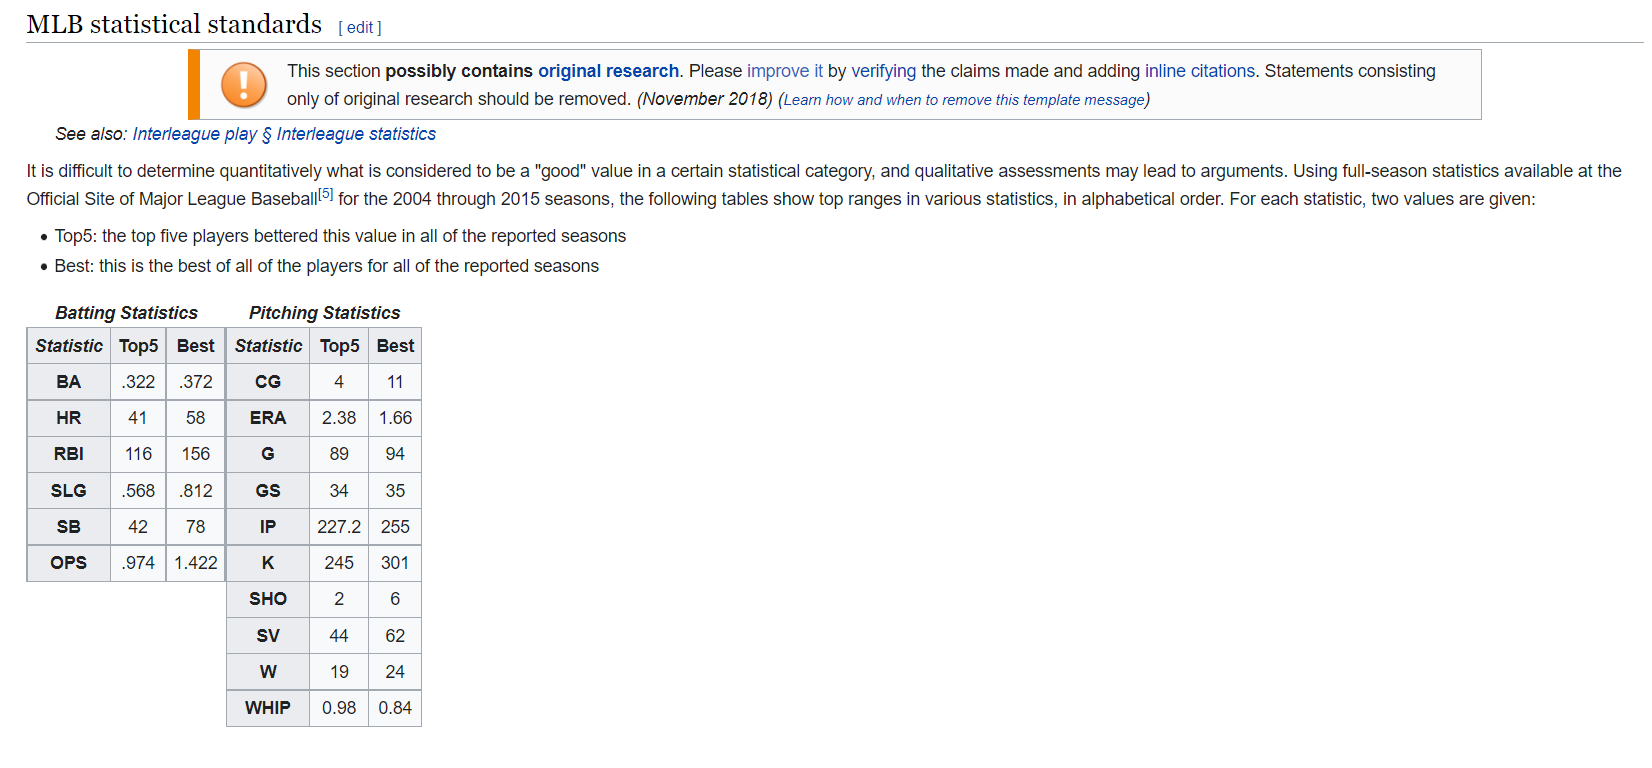

-----------------------------------------------------------------------------------------------------

## First glance to the data and preparation

------------------------------------------------------------------------------------------------------

In [3]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [4]:
df.rename(columns = {'R':'runs', 'AB':'at_bats', 'H':'hits', '2B':'doubles', '3B':'triples', 'HR':'homeruns', 'BB':'base_on_balls', 'SO':'strike_out (K or SO)', 'SB':'stolen_base', 'RA':'run_average', 'ER':'earned_run', 'ERA':'earned_run_average', 'CG':'complete_game', 'SHO':'shutout', 'SV':'save', 'E':'errors'}, inplace = True)

In [5]:
df

,W,runs,at_bats,hits,doubles,triples,homeruns,base_on_balls,strike_out (K or SO),stolen_base,run_average,earned_run,earned_run_average,complete_game,shutout,save,errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [6]:
last_column = df.pop('W')

In [7]:
df.insert(16, 'W', last_column)

In [8]:
df

,runs,at_bats,hits,doubles,triples,homeruns,base_on_balls,strike_out (K or SO),stolen_base,run_average,earned_run,earned_run_average,complete_game,shutout,save,errors,W
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,74
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88,93
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93,87
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77,81
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95,80
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97,78


In [9]:
df.shape

(30, 17)

In [10]:
df.describe()

,runs,at_bats,hits,doubles,triples,homeruns,base_on_balls,strike_out (K or SO),stolen_base,run_average,earned_run,earned_run_average,complete_game,shutout,save,errors,W
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333,80.966667
std,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889,10.453455
min,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000,63.000000
25%,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000,74.000000
50%,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000,81.000000
75%,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000,87.750000
max,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000,100.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   runs                  30 non-null     int64  
 1   at_bats               30 non-null     int64  
 2   hits                  30 non-null     int64  
 3   doubles               30 non-null     int64  
 4   triples               30 non-null     int64  
 5   homeruns              30 non-null     int64  
 6   base_on_balls         30 non-null     int64  
 7   strike_out (K or SO)  30 non-null     int64  
 8   stolen_base           30 non-null     int64  
 9   run_average           30 non-null     int64  
 10  earned_run            30 non-null     int64  
 11  earned_run_average    30 non-null     float64
 12  complete_game         30 non-null     int64  
 13  shutout               30 non-null     int64  
 14  save                  30 non-null     int64  
 15  errors                30 

### Visualization 

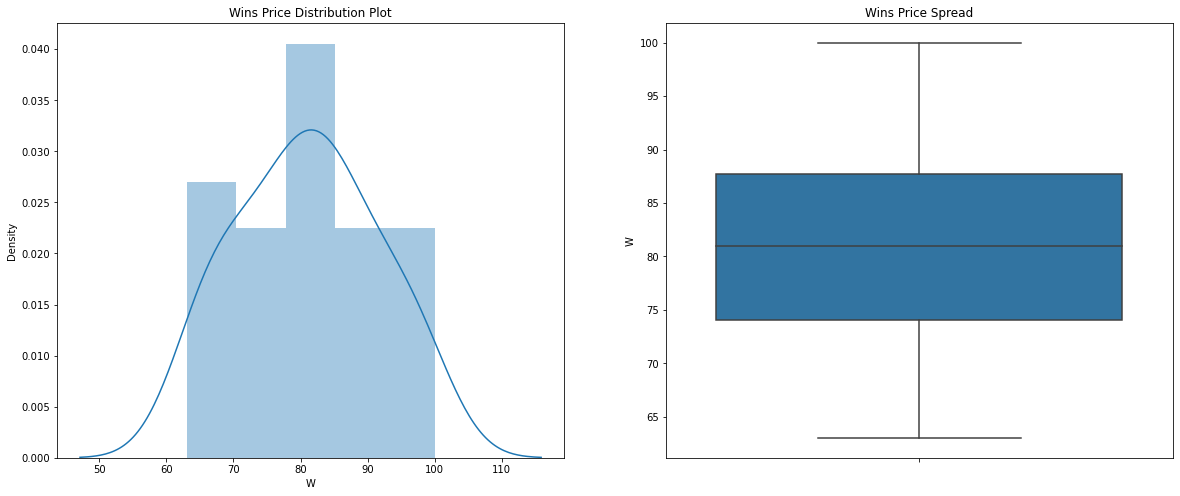

In [12]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Wins Price Distribution Plot')
sns.distplot(df.W)

plt.subplot(1,2,2)
plt.title('Wins Price Spread')
sns.boxplot(y=df.W)

plt.show()

In [13]:
print(df.W.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count     30.000000
mean      80.966667
std       10.453455
min       63.000000
25%       74.000000
50%       81.000000
75%       87.750000
85%       92.650000
90%       95.200000
100%     100.000000
max      100.000000
Name: W, dtype: float64


* Plot seems symmetrical
* No outliers

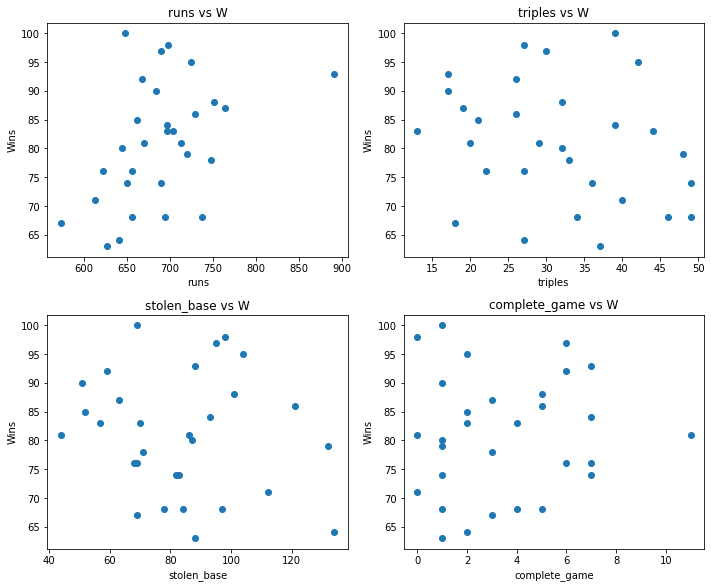

In [14]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['W'])
    plt.title(x+' vs W')
    plt.ylabel('Wins')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('runs', 1)
scatter('triples', 2)
scatter('stolen_base', 3)
scatter('complete_game', 4)

plt.tight_layout()

* Not very strong relationship between Wins and these features, the only exception might be runs

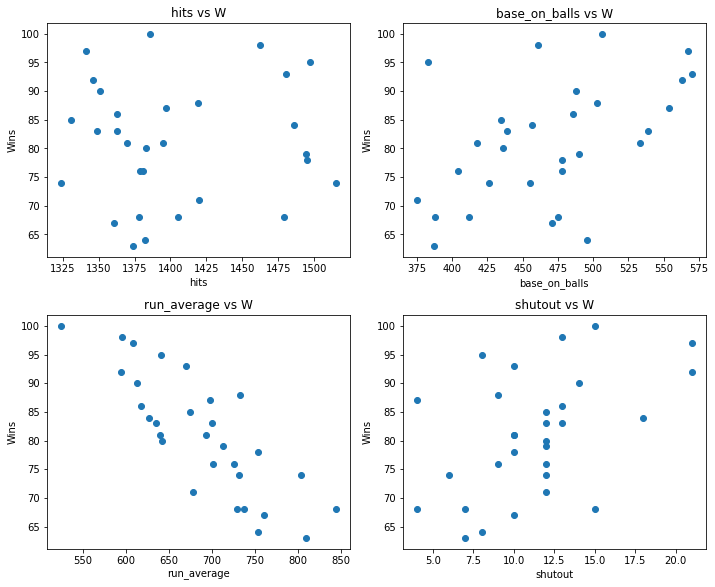

In [15]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['W'])
    plt.title(x+' vs W')
    plt.ylabel('Wins')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('hits', 1)
scatter('base_on_balls', 2)
scatter('run_average', 3)
scatter('shutout', 4)

plt.tight_layout()

* More or less clear relationship between wins and base on ball, not so clear with shoutout and hits features. 
* Negative relationship between wins and run average

-----------------------------------------------------------------------------------------------------

After this preliminary visual analysis of randomnly picked features, a conclusion cannot be reached. Further exploration will be necessary

<AxesSubplot:>

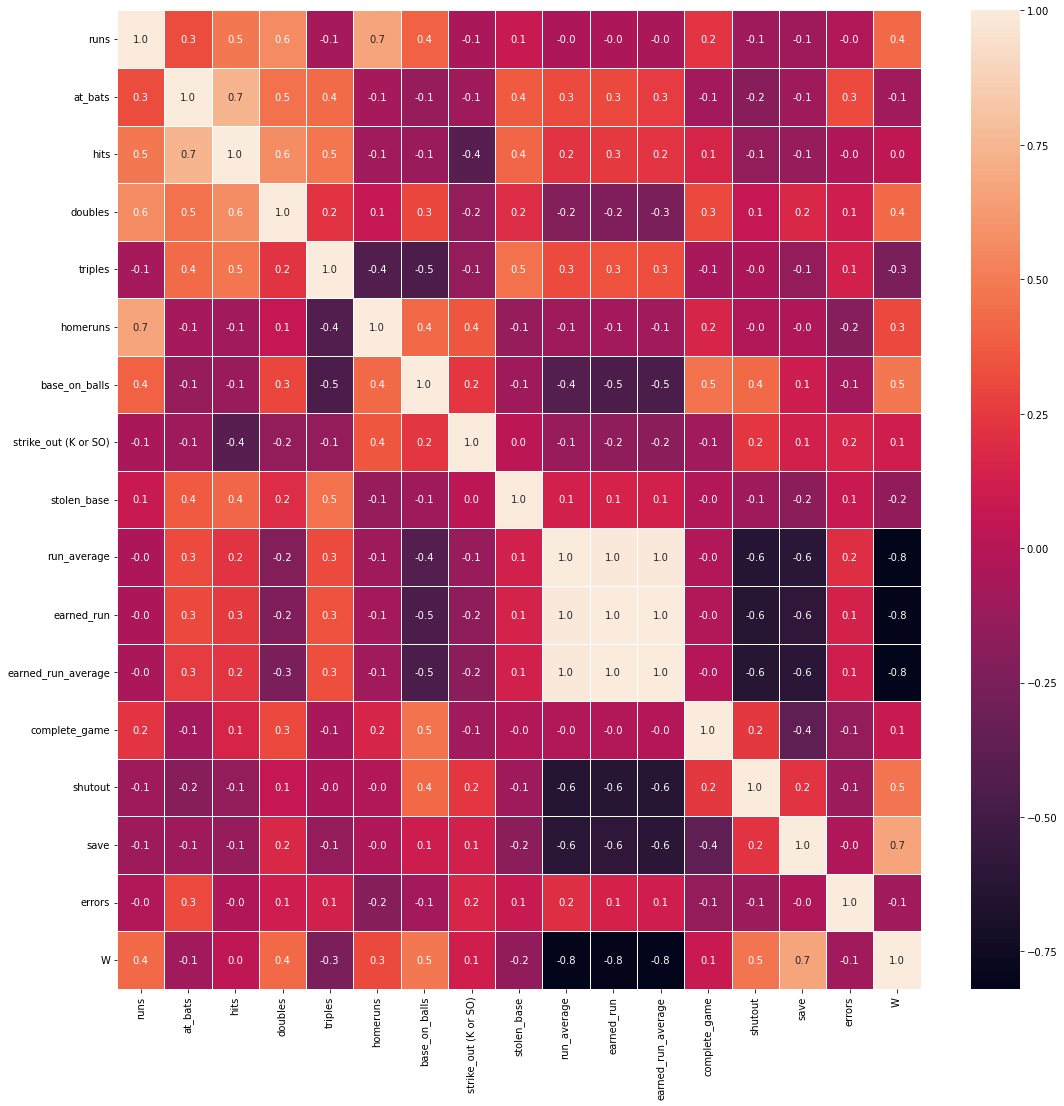

In [16]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [17]:
drop_list = ['triples', 'strike_out (K or SO)', 'stolen_base', 'run_average', 'earned_run', 'earned_run_average', 'shutout', 'save', 'errors']

In [18]:
df_1 = df.drop(drop_list,axis = 1 )        
df_1.head()

,runs,at_bats,hits,doubles,homeruns,base_on_balls,complete_game,W
0,724,5575,1497,300,139,383,2,95
1,696,5467,1349,277,156,439,2,83
2,669,5439,1395,303,141,533,11,81
3,622,5533,1381,260,136,404,7,76
4,689,5605,1515,289,151,455,7,74


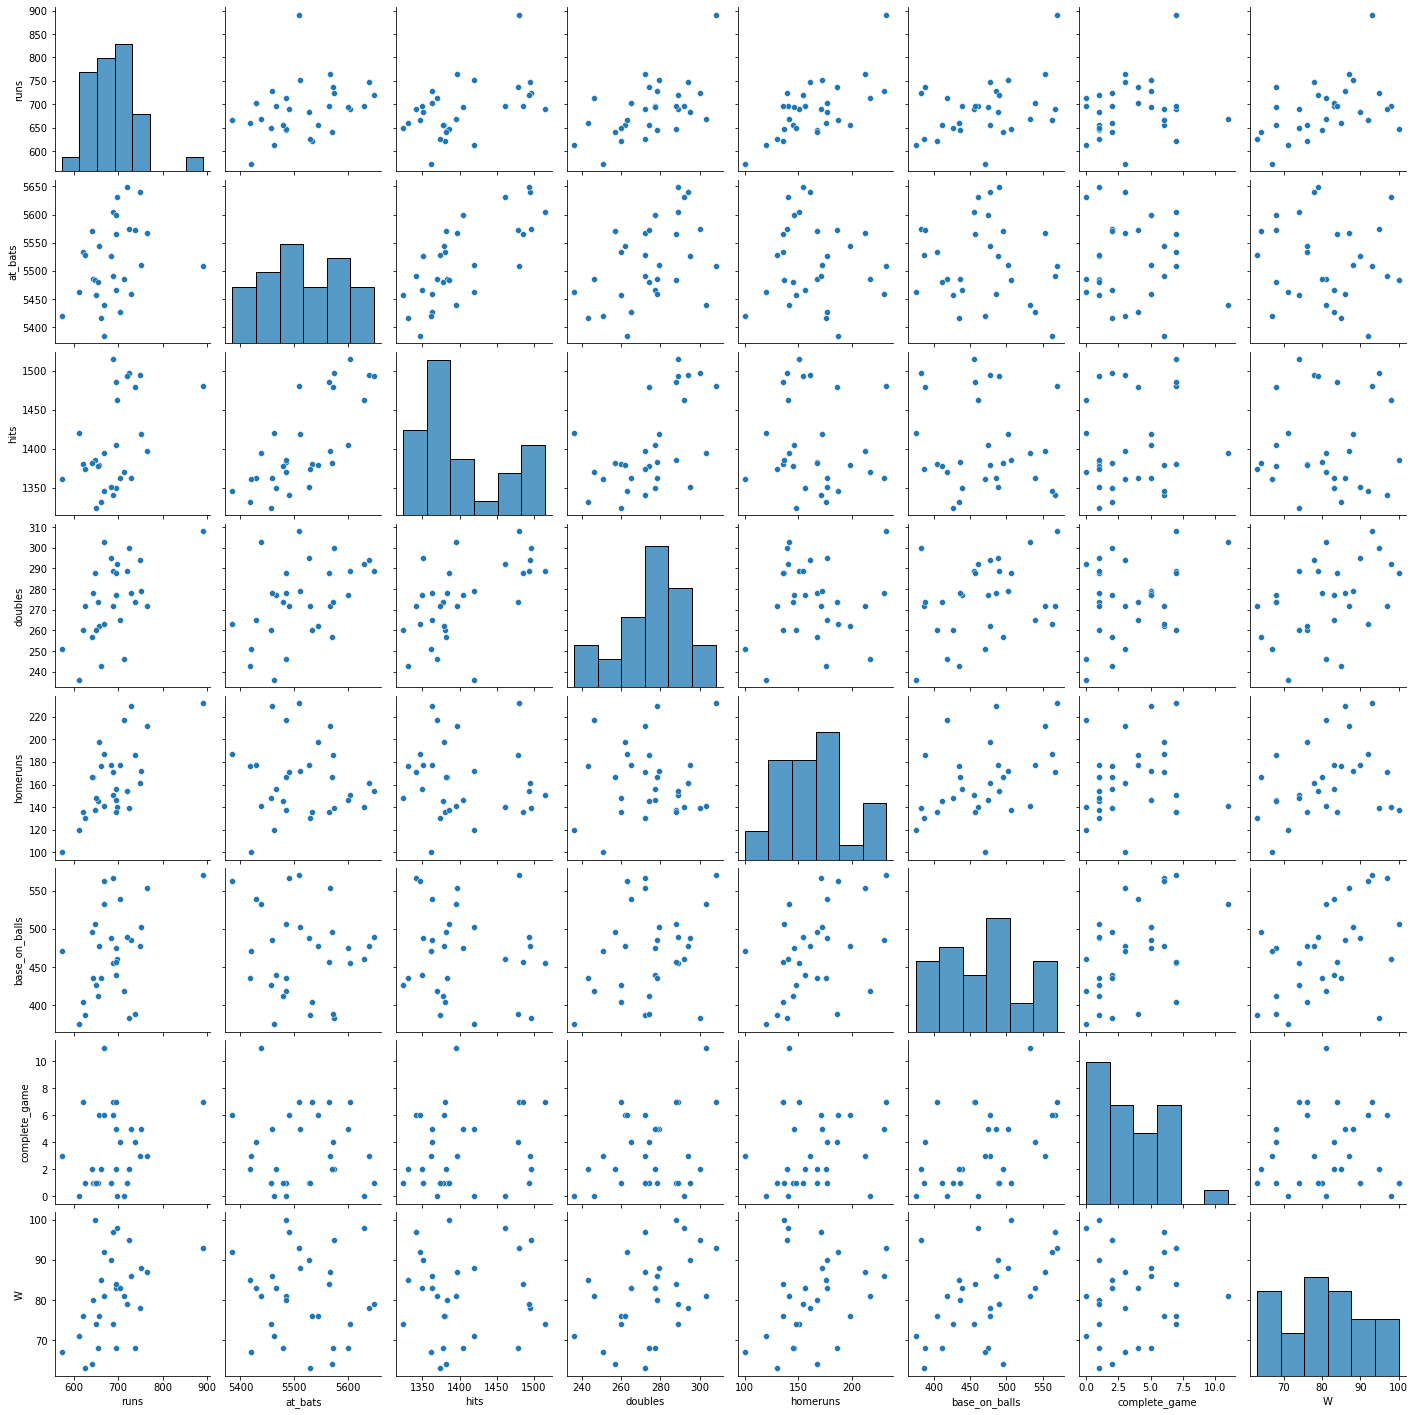

In [19]:
sns.pairplot(df_1)
plt.show()

In [20]:
df_1.shape

(30, 8)

In [21]:
df_1

,runs,at_bats,hits,doubles,homeruns,base_on_balls,complete_game,W
0,724,5575,1497,300,139,383,2,95
1,696,5467,1349,277,156,439,2,83
2,669,5439,1395,303,141,533,11,81
3,622,5533,1381,260,136,404,7,76
4,689,5605,1515,289,151,455,7,74
5,891,5509,1480,308,232,570,7,93
6,764,5567,1397,272,212,554,3,87
7,713,5485,1370,246,217,418,0,81
8,644,5485,1383,278,167,436,1,80
9,748,5640,1495,294,161,478,3,78


### Train-Test Split and Scaling 

In [22]:
X = df_1
y = df_1['W']

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [24]:
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [25]:
X_train

array([[-0.74981985, -0.45524414, -0.42071184,  0.12807421,  0.06488242,
        -0.45783578, -0.66833896, -0.09802383],
       [-1.20559269, -0.79667725,  0.27455884, -2.02357254, -1.3073808 ,
        -1.48167219, -1.02216547, -1.03213326],
       [-0.1764282 ,  0.1965827 , -1.02202702,  0.99897885,  0.35685332,
         0.41494281, -0.66833896,  0.93987554],
       [ 0.0294047 ,  1.81063012,  1.06378502,  0.84528979, -0.72343901,
        -0.03823069, -1.02216547,  1.77019503],
       [ 0.8233316 , -0.05173229,  0.25576774,  0.1793039 ,  0.21086787,
         0.66670586,  0.74696708,  0.73229566],
       [-1.79368669, -1.46402378, -0.83411603, -1.25512727, -1.8913226 ,
         0.12961135,  0.03931406, -1.44729301],
       [ 0.2646423 , -0.45524414, -0.66499613, -1.51127569,  1.52473692,
        -0.75995144, -1.02216547,  0.00576611],
       [ 0.1176188 , -1.33986629, -0.79653383, -0.53791169,  0.35685332,
         1.27093719,  0.39314057,  0.21334598],
       [-0.3822611 , -1.16914973

### Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [27]:
lm.fit(X_train,y_train)

LinearRegression()

#### Model evaluation 

In [28]:
print(lm.intercept_)

[1.01072803e-30]


In [29]:
predictions = lm.predict(X_test)

<AxesSubplot:ylabel='Density'>

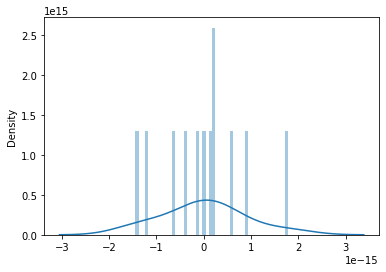

In [30]:
sns.distplot((y_test-predictions),bins=50)

#### Predictions from the model

In [31]:
predictions = lm.predict(X_test)

In [32]:
predictions = predictions.reshape(-1,1)

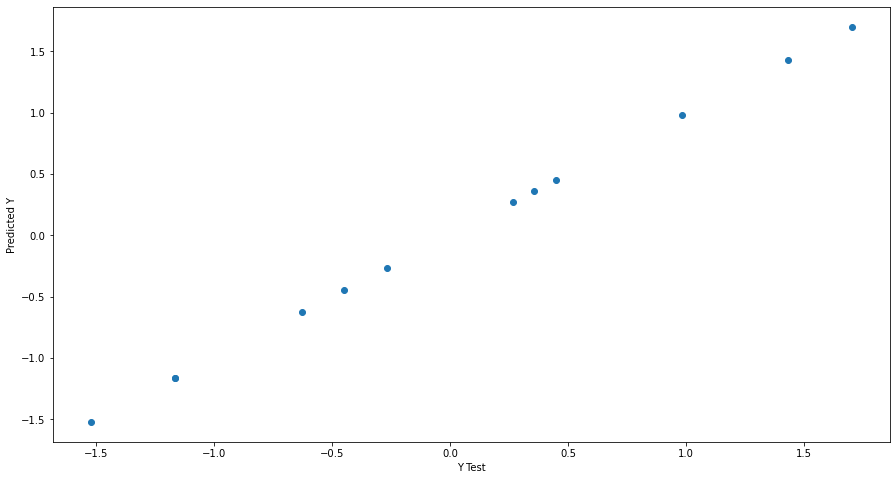

In [33]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#### Regression metrics

In [34]:
from sklearn import metrics

In [35]:
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6.337523098901935e-16
MSE: 7.115669167862707e-31
RMSE: 8.435442589374138e-16


*****************************************************************************************************

### Gradient Boosting Regression

In [36]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, loss='ls', max_depth=4)

In [38]:
clf_pred=clf.predict(X_test)
clf_pred= clf_pred.reshape(-1,1)

#### Regression metrics

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))

MAE: 0.11228913626165409
MSE: 0.02150823444945026
RMSE: 0.14665685953766452


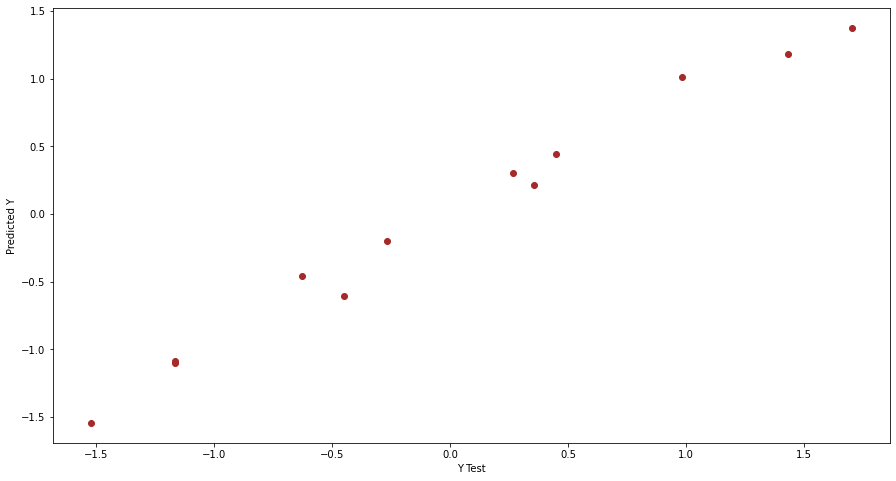

In [40]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,clf_pred, c= 'brown')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

### Decision Tree Regression

In [41]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=100)

In [42]:
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

#### Regression metrics

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

MAE: 0.3165672777137411
MSE: 0.17292689256230329
RMSE: 0.4158447938381618


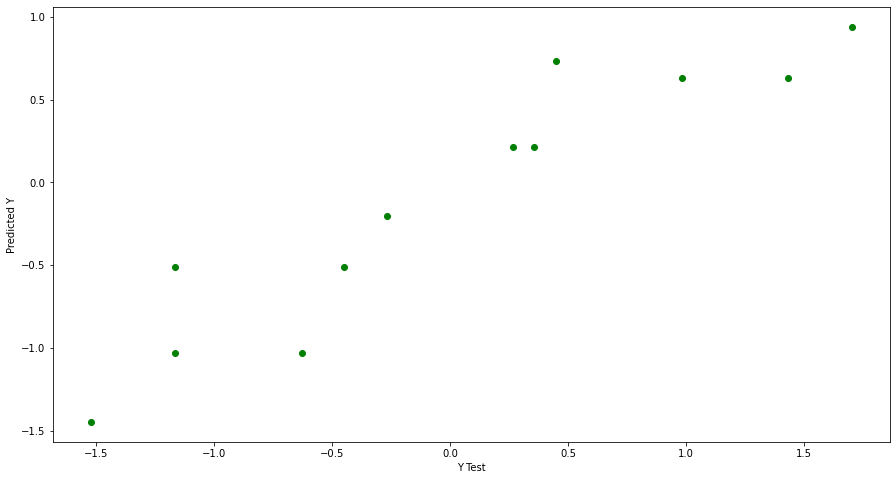

In [44]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

### Support Vector Machine

In [45]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

SVR()

In [46]:
svr_pred = svr.predict(X_test)
svr_pred= svr_pred.reshape(-1,1)

#### Regression metrics

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

MAE: 0.4720146301130921
MSE: 0.3070908503502417
RMSE: 0.5541577847059822


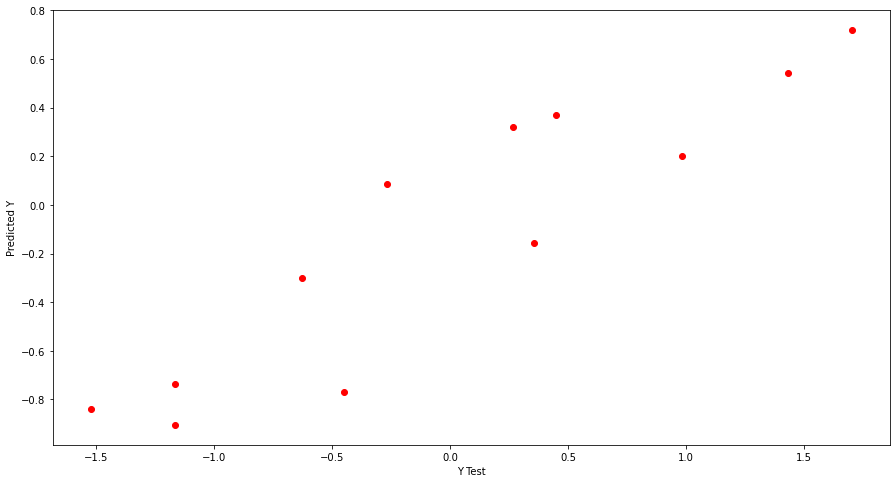

In [48]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,svr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

### Random Forest Regression

In [49]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [50]:
rfr_pred= rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)

#### Regression metrics

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

MAE: 0.2826708433060916
MSE: 0.12479248592010968
RMSE: 0.3532597994679124


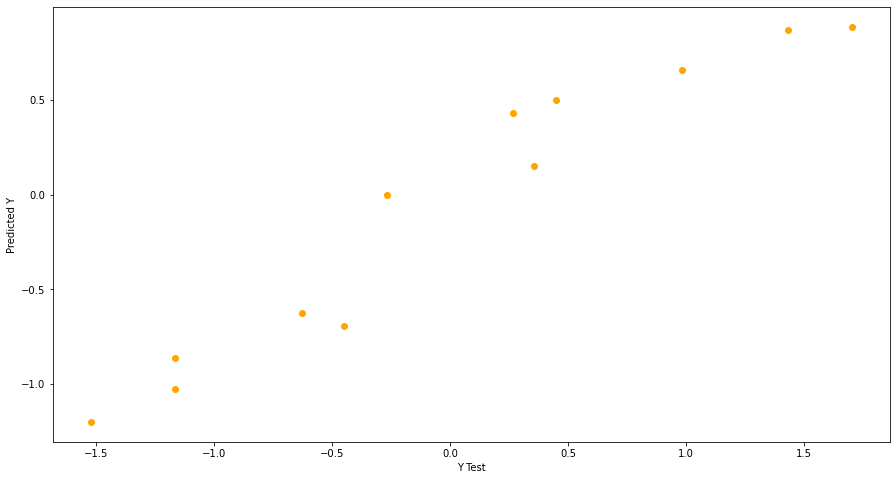

In [52]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,rfr_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

--------------------------------------------------------------------------------------------------------------------------------

Linear REgression is overfitting, the other models perform just OK, will stick with SVM